# Timing of LU factorization

In [1]:
using LinearAlgebra, Plots

We'll test the conclusion of $O(n^3)$ flops experimentally, using the built-in `lu` function instead of the purely instructive `lufact`.

In [2]:
lu(randn(3,3));  # throwaway to force compilation

n = 200:100:2400
t = zeros(size(n))
for (i,n) in enumerate(n) 
    A = randn(n,n)  
    t[i] = @elapsed for j = 1:6; lu(A); end
end

We plot the timings on a log-log graph and compare it to $O(n^3)$. The result could vary significantly from machine to machine.

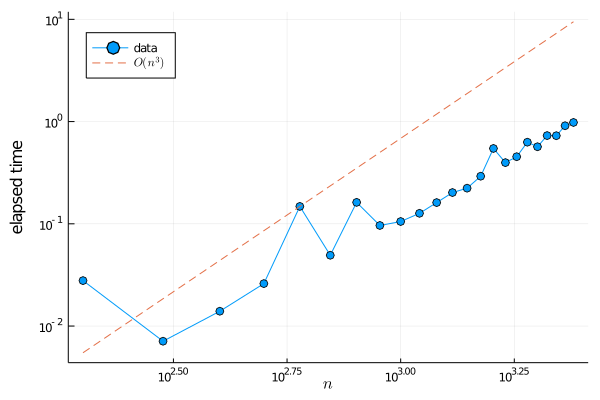

In [3]:
plot(n,t,m=:o,
    xaxis=(:log10,"\$n\$"), yaxis=(:log10,"elapsed time"), label="data", leg=:topleft)
plot!(n,(n/n[3]).^3*t[5],l=:dash,label="\$O(n^3)\$")